In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
# import squarify
import matplotlib.ticker as ticker

%matplotlib inline 
sns.set()

## EMISSAO DE CO2 (TONELADAS) PELO BRASIL

## MAX AND MIN TEMP BRASIL MEAN (ALL CITIES)

In [2]:
brasil = pd.read_csv('temperaturas_brasil.csv')

In [8]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323589 entries, 0 to 7323588
Data columns (total 15 columns):
Nome                    object
Latitude                float64
Longitude               float64
Altitude                float64
Estacao                 int64
Data                    object
Hora                    int64
Precipitacao            object
TempMaxima              object
TempMinima              object
Insolacao               object
EvaporacaoPiche         object
TempCompMedia           object
UmidadeRelativaMedia    object
VelocidadeVentoMedia    object
dtypes: float64(3), int64(2), object(10)
memory usage: 838.1+ MB


In [7]:
brasil.head()

,Nome,Latitude,Longitude,Altitude,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,EvaporacaoPiche,TempCompMedia,UmidadeRelativaMedia,VelocidadeVentoMedia
0,ACARAU - CE,-2.88,-40.14,16.5,82294,07/04/1976,1200,0.2,--,19.4,--,--,--,--,--
1,ACARAU - CE,-2.88,-40.14,16.5,82294,12/05/1976,1200,0,--,20.2,--,--,--,--,--
2,ACARAU - CE,-2.88,-40.14,16.5,82294,17/06/1976,0,--,30.4,--,9.1,2.5,21.8,74.25,5.566667
3,ACARAU - CE,-2.88,-40.14,16.5,82294,23/07/1976,0,--,31.6,--,10.8,8.4,--,70,6.633333
4,ACARAU - CE,-2.88,-40.14,16.5,82294,28/08/1976,0,--,31,--,9.4,11,--,72.75,8.6


In [9]:
brasil['TempMaxima'] = pd.to_numeric(brasil['TempMaxima'] , errors='coerce')
brasil['TempMinima'] = pd.to_numeric(brasil['TempMinima'] , errors='coerce')

In [10]:
brasil['Data'] = pd.DatetimeIndex(brasil['Data'])
brasil['Ano'] = pd.DatetimeIndex(brasil['Data']).year

brasil.drop(columns='Unnamed: 0',inplace=True)

In [12]:
tmax = brasil[['Nome','Ano','TempMaxima']].copy()
tmin = brasil[['Nome','Ano','TempMinima']].copy()

In [14]:
#delete rows with nan values
tmax.dropna(inplace=True)
tmin.dropna(inplace=True)

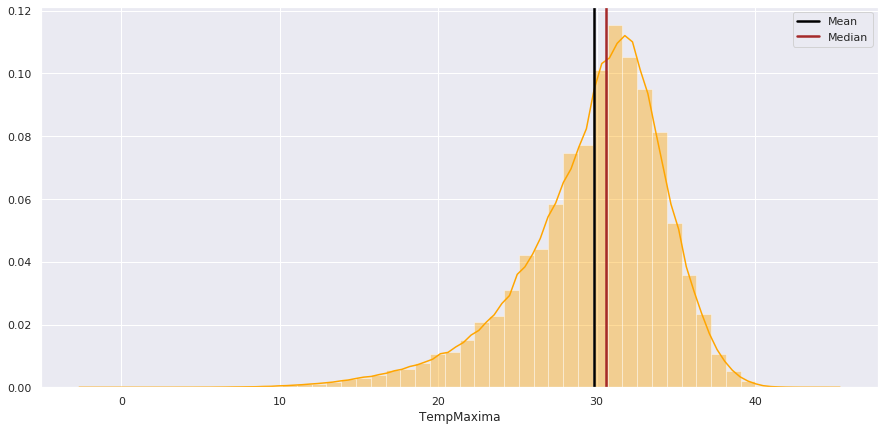

In [20]:
# histogram brazil max temp mean
fig, ax = plt.subplots(figsize=(15,7));
g=sns.distplot(tmax['TempMaxima'] , color='orange', kde=True)
plt.axvline(x=tmax['TempMaxima'].mean(), linewidth=2.5, label="Mean", c='black')
plt.axvline(x=tmax['TempMaxima'].median() , linewidth=2.5, label="Median", c='brown')
plt.legend();

In [22]:
# z-score
zmax= (20 - tmax['TempMaxima'].mean())/tmax['TempMaxima'].std()
zmax

-2.177222642688439

In [23]:
# probabilidade de uma cidade ter temperatura maxima menor que 20
round(stats.norm.cdf(zmax), 3)*100

1.5

## -----------------------------------------------------------------------------------------------------------------------------

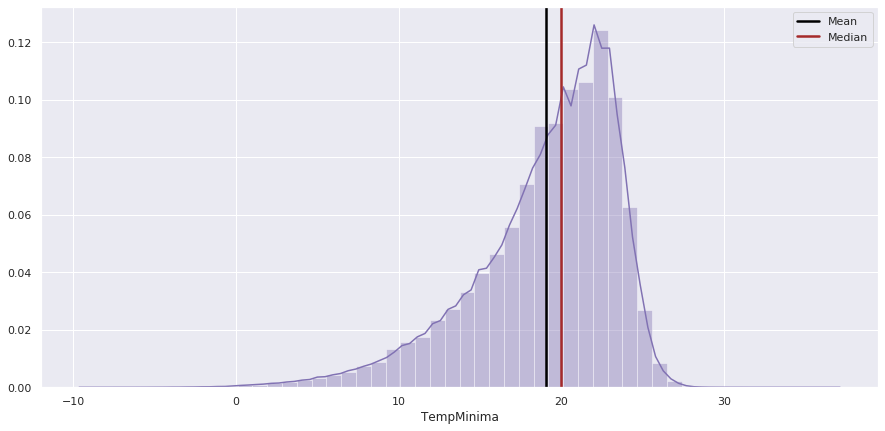

In [24]:
# histogram brazil min temp mean
fig, ax = plt.subplots(figsize=(15,7));
g=sns.distplot(tmin['TempMinima'] , color='m', kde=True)
plt.axvline(x=tmin['TempMinima'].mean(), linewidth=2.5, label="Mean", c='black')
plt.axvline(x=tmin['TempMinima'].median() , linewidth=2.5, label="Median", c='brown')
plt.legend();

In [25]:
#z-score
zmin= (10 - tmin['TempMinima'].mean())/tmin['TempMinima'].std()
zmin

-2.0645527663858894

In [26]:
# probabilidade de uma cidade ter temperatura minima maior que 10
100-round(stats.norm.cdf(zmin), 3)*100

98.1

## --------------------------------------------------------------------------------------------------------------------

In [27]:
tmax_year = tmax.groupby(['Ano'])['TempMaxima'].mean()
tmin_year = tmin.groupby(['Ano'])['TempMinima'].mean()

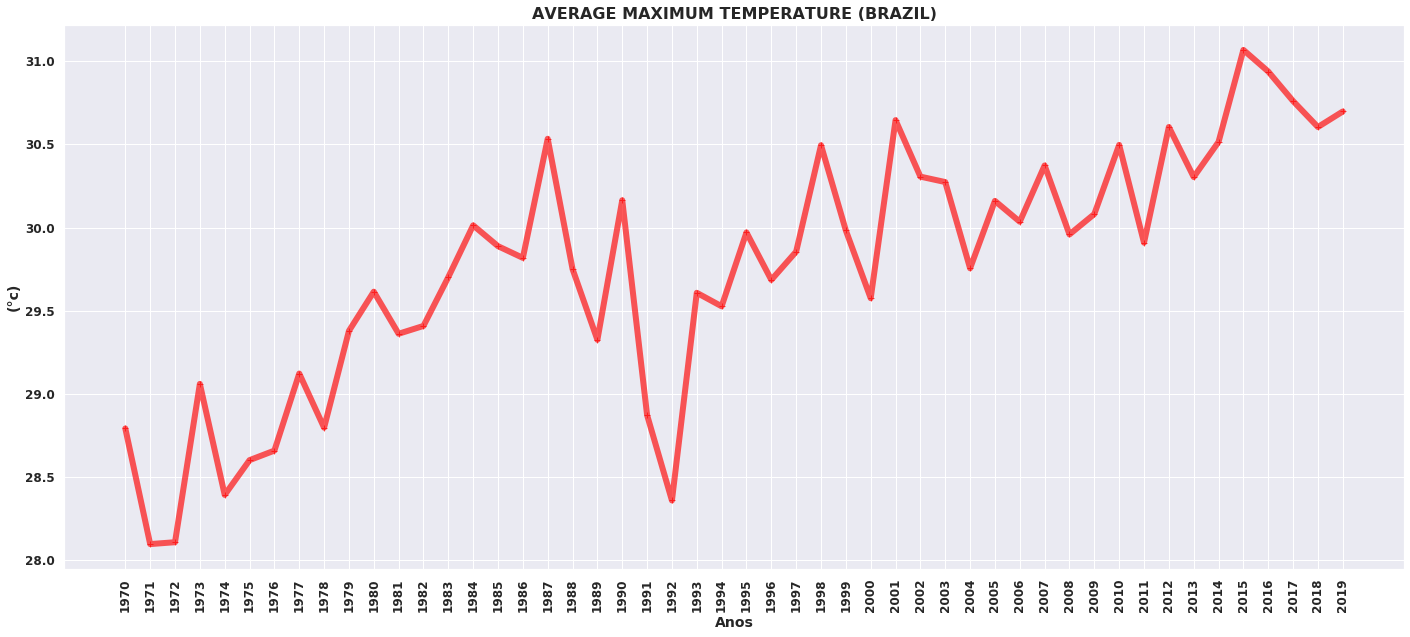

In [28]:
fig, ax = plt.subplots(figsize=(24,10));
color=(255/255, 0,0,0.65)

ax.plot(tmax_year.values, linewidth=6, marker='+' , color=color)

# plt.legend(fontsize=15)
plt.xlabel('Anos', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('(°c)', {'weight':'bold', 'fontsize': 14  })

plt.xticks(range(len(tmax_year.index)), tmax_year.index, rotation='vertical' , fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.title("AVERAGE MAXIMUM TEMPERATURE (BRAZIL)", fontsize=16, weight='bold')
plt.show()

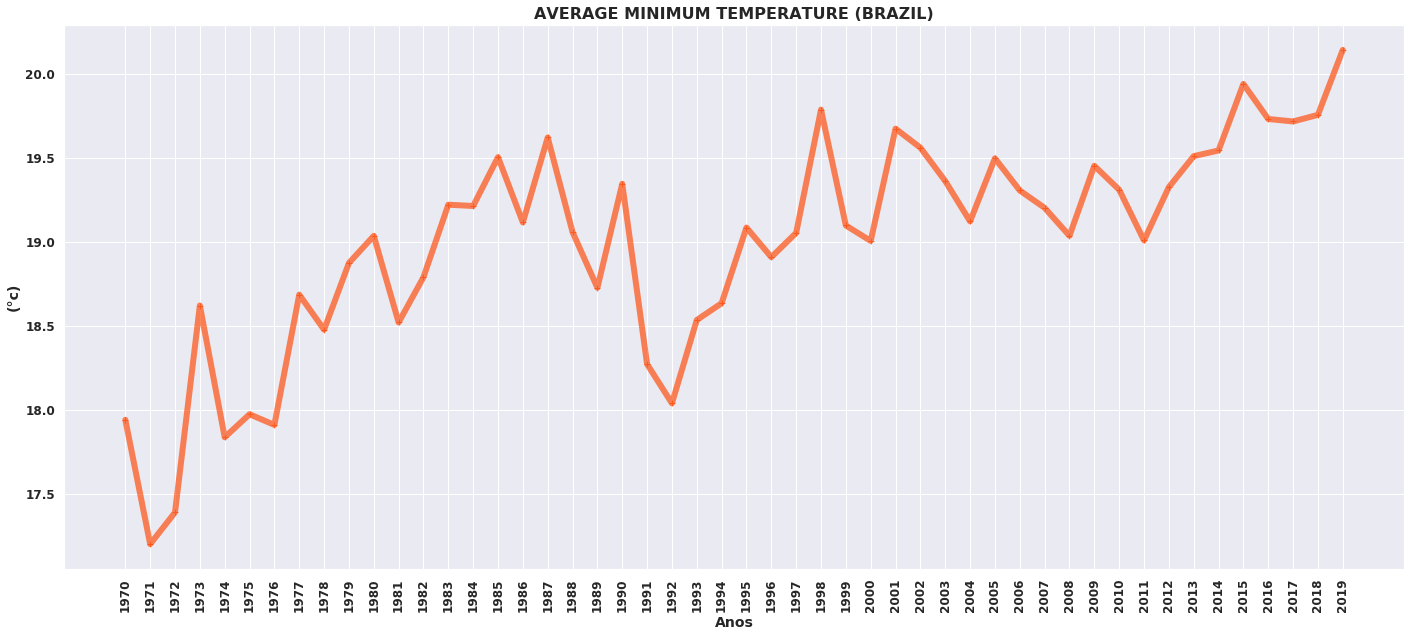

In [29]:
fig, ax = plt.subplots(figsize=(24,10));
color=(255/255,69/255,0,0.65)
ax.plot(tmin_year.values, linewidth=6, marker='+' , color=color)

# plt.legend(fontsize=15)
plt.xlabel('Anos', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('(°c)', {'weight':'bold', 'fontsize': 14  })

plt.xticks(range(len(tmax_year.index)), tmax_year.index, rotation='vertical' , fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.title("AVERAGE MINIMUM TEMPERATURE (BRAZIL)", fontsize=16, weight='bold')
plt.show()